# Quantum Cellular Automata

We have begun by looking at classical cellular automata and their potential applications in physics. 


## What is a cellular automaton?

Any grid or lattice of cells of finite dimension that has the following properties:

- Each cell is in one of a finite number of *states*
- Each cell has a set of cells defined as its *neighbourhood*
- The state of each cell evolves with time, and is dependent on the present state of the cell and the state of its neighbours
- This updation rule may or may not be constant with time
 
In general, there are four parameters that define the structure of a cellular automata:
1. **Discrete $n$-dimensional lattice of cells** - Usually homgenous (all cells are equivalent)
2. **Discrete states** - Each cell is in one and only one state at a given time, where the state $σ ∈ Σ$, such that $Σ$ is of finite cardinality.
3. **Local interactions** - Behaviour only depends on the local neighbourhood (defined for that structure). Actions at a distance are not allowed.
4. **Discrete dynamics** - After every time step, there is a change of state according to a deterministic transition function $ϕ : Σ^{n} → Σ$. This update may or may not be synchronus (though it usually is), and may or may not take the state at time $t-1$ as input to determine the state at time $t$. 


### Wolfram code

For a CA such that:

- The system is a one dimensional lattice of square cells in a line
- Every cell $c_{i}$ can be in one of two states at a time - $0$ or $1$
- The neighbourhood of a cell $c_{i}$ is defined as the set of cells {$c_{i-1}$, $c_{i+1}$}

Since the next state function is dependent on the present state of 3 cells ($n = 3$), and each cell can take one of 2 possible states, the total number of possible rules is $2^{8}$.

A ruleset can be used to describe this next state function.
For example,

| Input states | Next state | 
| :-: | :-: |
| 000 | 0 |
| 001 | 0 |
| 010 | 1 |
| 011 | 1 |
| 100 | 0 |
| 101 | 1 |
| 110 | 1 |
| 111 | 0 |

Where the input states are ordered as $c_{i-1}(t-1), c_{i}(t-1), c_{i+1}(t-1)$, and the output state is $c_{i}(t)$.

This particular rule can be read as its sequential outputs (in reverse order), which is $01101100$, which is the binary equivalent of 108. Thus, this is rule 108 in the Wolfram Code.


#### Classification
- Class 1 : Rules that quickly produce homogenous states with all the states ending up with the same value.
- Class 2 : Rules that lead to stable structures or simple periodic patterns.
- Class 3 : Rules that lead to seemingly random, non periodic behaviour.
- Class 4 : Rules that lead to complex patterns and structures that locally propagate in the lattice.


#### Possible applications

- Modelling of magnetic domains (using the Ising model of ferromagnetism)
- Random number generation

### Classical Cellular Automata Implementation

You can find the code for a classical cellular automata based on a specific ruleset below. The ruleset is defined in a manner that is a little different as what is specified above. The ruleset is based on the rule that if the state of the $(i-1)^{th}$ bit is $1$ then in the next timestep, the state of the ith bit will be flipped. It is important to note that this is just a different way of defining the ruleset, however, it is still one of the possible $2^8$ rulesets, and not something outside that scope. It is also important to note that we have assumed a circular (ring like) structure of the cellular automata. What this basically means is that the element preceding the $0^{th}$ element of the array is the last element of the array. The elements of the array can be thought of as arrange in a ring. 

In [21]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  5 11:13:29 2021

@author: Astitva

Example of discrete time evolution:

 1 gen :0 0 0 0 0 1 0 0 
 2 gen :1 1 1 1 0 0 1 1
 
Example of a ruleset :

a b c
0 0 0 -> 1
0 1 0 -> 0 
0 0 1 -> 0 
1 0 0 -> 1
1 1 0 -> 0 
1 0 1 -> 1 
0 1 1 -> 1
1 1 1 -> 0

 
2^8 -> no of rulesets possible

2d cellular automata are also well defined, and are based on the same basic principles as this


"""
# Cellular Automata 1D
def flip(x):                                #state fliping
    if x == 0:
        x=1
    else: 
        x=0
    return x

n = int (input())                           #accepts length of CA
a = list(map(int,input().split()))          #accepts the CA
t = int(input())                            #accepts timesteps
for j in range(t) :
    b = []                                  #newstep CA
    for i in range(n):                      #the timestep (transformation)
        if i == 0 : 
            if a[n-1] == 1:
                b.append(flip(a[i]))
            else:
                b.append(a[i])
        else:
            if a[i-1] ==1:
                b.append(flip(a[i]))
            else:
                b.append(a[i])
    print(b)                             #printing the CA after transformation
    for i in range(n):     #making the original CA = new CA (for further steps) 
        a[i]=b[i]

6
1 0 1 1 0 1
5
[0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 0]
[1, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 0]


In [23]:
a = list(map(int, input("Enter the input array: ").split()))
ruleset = {}
for i in range(8):
    n =bin(i)[2:]
    for i in range(len(n),3):
        n = "0"+n
    ruleset[n]=(int(input("What should " + n + " map to ? ")))
t=int(input("How many timesteps? "))
for s in range(t):
    b =[]
    for i in range(len(a)):
        if i != len(a)-1:
            b.append(ruleset[str(a[i-1])+str(a[i])+str(a[i+1])])
        else:
            b.append(ruleset[str(a[i-1])+str(a[i])+str(a[0])]) 
    for i in b:
        print(str(b[i])+" ",end='')
    print()
    for i in range(len(b)):
        a[i]=b[i]
        

Enter the input array: 1 0 1 0 1
What should 000 map to ? 0
What should 001 map to ? 1
What should 010 map to ? 0
What should 011 map to ? 1
What should 100 map to ? 0
What should 101 map to ? 0
What should 110 map to ? 1
What should 111 map to ? 0
How many timesteps? 7
0 1 1 1 0 
0 1 1 0 0 
0 1 0 0 1 
0 0 0 0 0 
0 1 1 1 0 
1 1 1 1 1 
1 1 1 1 1 


## What is quantum cellular automata?

In the Schrödinger picture of quantum mechanics, the state of the system at time $t$ is described by statevetor $|ψ_t⟩$ in Hilbert space ℋ. This statevector evolves reversibly such that 

$|ψ_{t+1}⟩ = U|ψ_t⟩$

where $U$ is a unitary operator. 

### Watrous QCA

Defined by a 4-tuple - $(L, Σ, 𝒩, f)$ 
- 1 dimensional lattice $L ⊆ \mathbb{Z} $
- Finite set of states Σ, including a quiescent(dormant) state $ϵ$
- A finite neighbourhood scheme 𝒩
- A local transition function $f : Σ^𝒩 → ℋ_Σ$

Where $ℋ_Σ$ is the Hilbert space spanned by the set of states $Σ$


In general, a $d$-dimensional lattice of identical finite-dimensional quantum systems, each with a finite set of states that span a finite-dimensional Hilbert space, a finite neighbourhood scheme, a set of local transition rules ddescribed by unitary operators, which represent discrete time-evolution, with finite propagation speed.

Direct quantisation of above classical model, allows for linear superposition of classical states, maps cell configurations of neighbourhood to a quantum state.

Quiescent states allows for finite number of active states, makes the lattice finite. Important to avoid infinite product of unitaries. Makes for a well-defined QCA.

#### Drawbacks
- Allows transition functions that do not preserve norm, or that induce a non-unitary global transition function.
- This leads to non-physical properties like FTL communication (superluminal communication)

So, we modify it a little.

Partitioned Qatrous QCA. 
It can simulate a Quantum Turing Machine.


[Ref](https://arxiv.org/pdf/0808.0679.pdf)


## Quantum Cellular Automata Implementation

In [2]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.quantum_info.operators import Operator

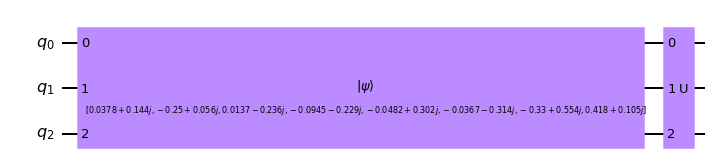

In [3]:
qca = QuantumCircuit(3)

init_state = [0, 0, 1, 0, 0, 0, 0, 0]

random_state = random_statevector(8).data
qca.initialize(random_state, [0, 1, 2])

'''
| _ | _ | _ | _ | _ |

000 - 000
001 - 100
010 - 001
011 - 101
100 - 010
101 - 110
110 - 011
111 - 111

00 - 0
01 - 0
10 - 1
11 - 1
'''

op = Operator([
              [1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0],
              [0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1]])

qca.unitary(op, [0,1,2], label='U')

qca.draw('mpl')
  

In [4]:
backend = Aer.get_backend('statevector_simulator')
fin = execute(experiments = qca, backend = backend).result().get_statevector(qca)

print(fin)

[ 0.03778719+0.14355919j  0.01370015-0.23566563j -0.04820539+0.30220095j
 -0.3301401 +0.55424398j -0.24991421+0.05599815j -0.09453815-0.22937411j
 -0.03671359-0.31376432j  0.41769056+0.10490314j]


In [5]:
n = int(input())

4


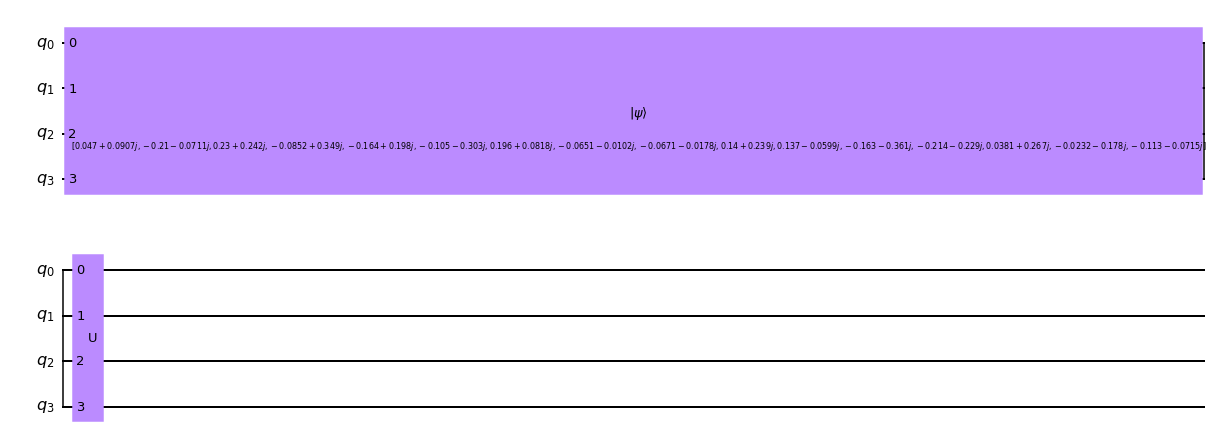

In [6]:
# n = 3
dim = 2**n

mat = [[0 for i in range(dim)] for j in range(dim)]

for i in range(dim):
    x = bin(i)[2:].zfill(n)
    y = x[-1] + x[:-1]
    z = int(y, base = 2)
    # print(x, '-', y, '-', z)
    mat[z][i] = 1

# print(mat)


qca1 = QuantumCircuit(n)

random_state = random_statevector(dim).data
qca1.initialize(random_state, [i for i in range(n)])

op = Operator(mat)
qca1.unitary(op, [i for i in range(n)], label = 'U')
qca1.draw('mpl')

In [7]:
backend = Aer.get_backend('statevector_simulator')
fin = execute(experiments = qca1, backend = backend).result().get_statevector(qca1)

print(fin)

[ 0.0470264 +0.09071126j  0.22971599+0.24245081j -0.16391194+0.19775316j
  0.19646609+0.08179635j -0.06714224-0.01780878j  0.13685632-0.05988151j
 -0.21397259-0.22936515j -0.02316857-0.17819141j -0.21015408-0.07114668j
 -0.08523064+0.34895016j -0.10453781-0.3025608j  -0.06512628-0.01020644j
  0.13972493+0.2389248j  -0.16267825-0.36105515j  0.03811607+0.26661207j
 -0.11301479-0.07147511j]
